In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("All the Intermediate Colleges in Pakistan.csv")

# Analyzing the Data

In [3]:
data.shape

(1630, 6)

In [4]:
data.head()

,Name,Location,Study Program,Sector,Affiliation,Rating
0,Campus.pk Lahore,"Office 206, 2nd Floor Siddique Trade Center Ma...",FSc Pre Engineering Fsc Pre Medical,Private,ads,0*
1,Allama Iqbal Open University Aiou Islamabad,"Sector H-8, Islamabad-44000",FSc Pre Engineering ICs Computer Science FSc P...,Public,NaN,5*
2,Government College University Gcu Lahore,"GC University, Katchery Road Lahore 54000",FSc Pre Engineering ICS Computer Science FSc P...,Public,HEC,4*
3,Govt College University GCU Faisalabad,"Kotwali Rd, Faisalabad 38000",FSc Pre-Engineering ICS FSc Pre-Medical Icom F...,Public,HEC,3*
4,Lahore College For Women University (Lcwu) Lahore,"Near Wapda Flats, Jail Road, Lahore",FA Arts FSc Pre Engineering ICS Physics ICS St...,Public,NaN,5*


In [5]:
data.tail()

,Name,Location,Study Program,Sector,Affiliation,Rating
1625,Riphah International College Lodhran,Riphah International College Lodhran,Fsc Pre Engineering FSc Pre Medical ICS ICOM FA,Private,NaN,0*
1626,Govt College of Education Bagh,Bagh Azad Kashmir,FA ICS Computer Science FSc Pre Engineering IC...,Public,NaN,0*
1627,Riphah International College Swat,Riphah International College Swat,Fsc Pre Engineering FSc Pre Medical ICS ICOM FA,Private,NaN,0*
1628,Riphah International College Dina,Riphah International College Dina,Fsc Pre Engineering FSc Pre Medical ICS ICOM FA,Private,NaN,0*
1629,Riphah International College Dargai,Riphah International College Dargai,Fsc Pre Engineering FSc Pre Medical ICS ICOM FA,Private,NaN,0*


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           1630 non-null   object
 1   Location       1626 non-null   object
 2   Study Program  1630 non-null   object
 3   Sector         1101 non-null   object
 4   Affiliation    155 non-null    object
 5   Rating         1630 non-null   object
dtypes: object(6)
memory usage: 76.5+ KB


# Statistic Summary

In [7]:
data.describe()

,Name,Location,Study Program,Sector,Affiliation,Rating
count,1630,1626,1630,1101,155,1630
unique,1630,1573,774,2,97,21
top,Campus.pk Lahore,Chakwal,FA ICS Computer Science FSc Pre Medical FSc Pr...,Private,University of Sargodha,0*
freq,1,11,49,562,7,1119


# Check for Duplication

In [8]:
# nunique() tells the unique value of each column
data.nunique()

Name             1630
Location         1573
Study Program     774
Sector              2
Affiliation        97
Rating             21
dtype: int64

In [9]:
data.duplicated().sum()



0

# Missing Values Calculation

In [10]:
# to check null values in dataset
data.isnull().sum()

Name                0
Location            4
Study Program       0
Sector            529
Affiliation      1475
Rating              0
dtype: int64

In [11]:
type(data)

pandas.core.frame.DataFrame

In [12]:
data['Name'].value_counts()

Name
Campus.pk Lahore                              1
Capital College Islamabad                     1
Punjab Group of Colleges Kallar Saydan        1
Govt Boys Degree College Quaidabad Khushab    1
Govt Degree College Women Raiwind Lahore      1
                                             ..
Govt College For Women Bund Road Lahore       1
Kips College Karachi                          1
Margila Cadet College Islamabad               1
Kips Academy Dera Ghazi (DG) Khan             1
Riphah International College Dargai           1
Name: count, Length: 1630, dtype: int64

In [13]:
data.dtypes

Name             object
Location         object
Study Program    object
Sector           object
Affiliation      object
Rating           object
dtype: object

# Type Casting 'Rating' Variable 

In [14]:
data['Rating'] = data['Rating'].str.replace('*', '')

In [15]:
data['Rating']=data['Rating'].astype(float)

In [16]:
data.head()

,Name,Location,Study Program,Sector,Affiliation,Rating
0,Campus.pk Lahore,"Office 206, 2nd Floor Siddique Trade Center Ma...",FSc Pre Engineering Fsc Pre Medical,Private,ads,0.0
1,Allama Iqbal Open University Aiou Islamabad,"Sector H-8, Islamabad-44000",FSc Pre Engineering ICs Computer Science FSc P...,Public,NaN,5.0
2,Government College University Gcu Lahore,"GC University, Katchery Road Lahore 54000",FSc Pre Engineering ICS Computer Science FSc P...,Public,HEC,4.0
3,Govt College University GCU Faisalabad,"Kotwali Rd, Faisalabad 38000",FSc Pre-Engineering ICS FSc Pre-Medical Icom F...,Public,HEC,3.0
4,Lahore College For Women University (Lcwu) Lahore,"Near Wapda Flats, Jail Road, Lahore",FA Arts FSc Pre Engineering ICS Physics ICS St...,Public,NaN,5.0


In [17]:
data['Rating'].sort_values()

0       0.0
1088    0.0
1087    0.0
1086    0.0
1085    0.0
       ... 
1496    5.0
118     5.0
288     5.0
127     5.0
378     5.0
Name: Rating, Length: 1630, dtype: float64

# Handling Missing Values

In [18]:
def infer_sector(name):
    name = str(name).lower()
    if 'govt' in name or 'government' in name:
        return 'Public'
    else:
        return 'Unknown'

# Apply this only to rows where Sector is missing
data['Sector'] = data.apply(lambda row: infer_sector(row['Name']) if pd.isnull(row['Sector']) else row['Sector'], axis=1)

In [19]:
data.head(67)

,Name,Location,Study Program,Sector,Affiliation,Rating
0,Campus.pk Lahore,"Office 206, 2nd Floor Siddique Trade Center Ma...",FSc Pre Engineering Fsc Pre Medical,Private,ads,0.0
1,Allama Iqbal Open University Aiou Islamabad,"Sector H-8, Islamabad-44000",FSc Pre Engineering ICs Computer Science FSc P...,Public,NaN,5.0
2,Government College University Gcu Lahore,"GC University, Katchery Road Lahore 54000",FSc Pre Engineering ICS Computer Science FSc P...,Public,HEC,4.0
3,Govt College University GCU Faisalabad,"Kotwali Rd, Faisalabad 38000",FSc Pre-Engineering ICS FSc Pre-Medical Icom F...,Public,HEC,3.0
4,Lahore College For Women University (Lcwu) Lahore,"Near Wapda Flats, Jail Road, Lahore",FA Arts FSc Pre Engineering ICS Physics ICS St...,Public,NaN,5.0
...,...,...,...,...,...,...
62,Govt. College of Technology Railway Road Lahore,"Govt. College of Technology, Railway Road, Lahore",DAE Architecture Technology DAE Auto and Dies...,Public,NaN,3.0
63,Murray College Sialkot,NaN,FA ICS Computer Science Icom FSc Pre Engineeri...,Unknown,Affiliate with Punjab University,5.0
64,Unique Group of Institutions Lahore,"106-A New Muslim Town, Lahore",FSc Pre Medical FSc Pre Engineering ICS FA Gen...,Unknown,BISE Lahore\n Cambridge University,4.0
65,Govt. Postgraduate College for Women Samanabad...,Samanabad Lahore,FA FSc Pre Engineering FSc Pre Medical ICom ICS,Public,NaN,1.0


In [20]:
data.fillna({'Location': 'Unknown', 'Affiliation': 'Unspecified'}, inplace=True)

In [21]:
data.head(65)

,Name,Location,Study Program,Sector,Affiliation,Rating
0,Campus.pk Lahore,"Office 206, 2nd Floor Siddique Trade Center Ma...",FSc Pre Engineering Fsc Pre Medical,Private,ads,0.0
1,Allama Iqbal Open University Aiou Islamabad,"Sector H-8, Islamabad-44000",FSc Pre Engineering ICs Computer Science FSc P...,Public,Unspecified,5.0
2,Government College University Gcu Lahore,"GC University, Katchery Road Lahore 54000",FSc Pre Engineering ICS Computer Science FSc P...,Public,HEC,4.0
3,Govt College University GCU Faisalabad,"Kotwali Rd, Faisalabad 38000",FSc Pre-Engineering ICS FSc Pre-Medical Icom F...,Public,HEC,3.0
4,Lahore College For Women University (Lcwu) Lahore,"Near Wapda Flats, Jail Road, Lahore",FA Arts FSc Pre Engineering ICS Physics ICS St...,Public,Unspecified,5.0
...,...,...,...,...,...,...
60,Allama Iqbal Open University Multan,"Regional Campus, Allama Iqbal Open University,...",Intermediate in Commerce (I.Com) Higher Secon...,Public,Unspecified,0.0
61,Allama Iqbal Open University AIOU Faisalabad,"Regional Campus, Allama Iqbal Open University,...",Intermediate in Commerce (I.Com),Public,Unspecified,0.0
62,Govt. College of Technology Railway Road Lahore,"Govt. College of Technology, Railway Road, Lahore",DAE Architecture Technology DAE Auto and Dies...,Public,Unspecified,3.0
63,Murray College Sialkot,Unknown,FA ICS Computer Science Icom FSc Pre Engineeri...,Unknown,Affiliate with Punjab University,5.0


In [22]:
data.isnull().sum()

Name             0
Location         0
Study Program    0
Sector           0
Affiliation      0
Rating           0
dtype: int64

In [23]:
cat_col = data.select_dtypes(include = ['object']).columns

In [24]:
num_col = data.select_dtypes(include = np.number).columns

In [25]:
print("Categorical Variables:")
print(cat_col)
print("Numerical Variables:")
print(num_col)

Categorical Variables:
Index(['Name', 'Location', 'Study Program', 'Sector', 'Affiliation'], dtype='object')
Numerical Variables:
Index(['Rating'], dtype='object')


# Univariate analysis 

## Numerical Variable

Rating
Skew : 1.23


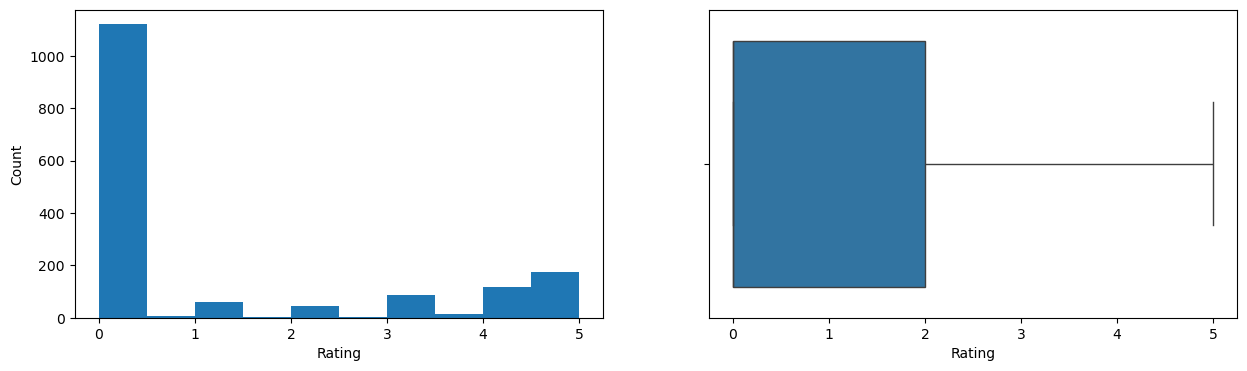

In [26]:
for col in num_col:
    print(col)
    print('Skew :' ,round(data[col].skew(),2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('Count')
    plt.xlabel('Rating')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

## Categorical Variables

In [27]:
top_Name = data['Name'].value_counts().nlargest(10).index
top_Location = data['Location'].value_counts().nlargest(10).index
top_StudyProgram = data['Study Program'].value_counts().nlargest(10).index
top_Sector = data['Sector'].value_counts().nlargest(10).index
top_Affiliation = data['Affiliation'].value_counts().nlargest(10).index

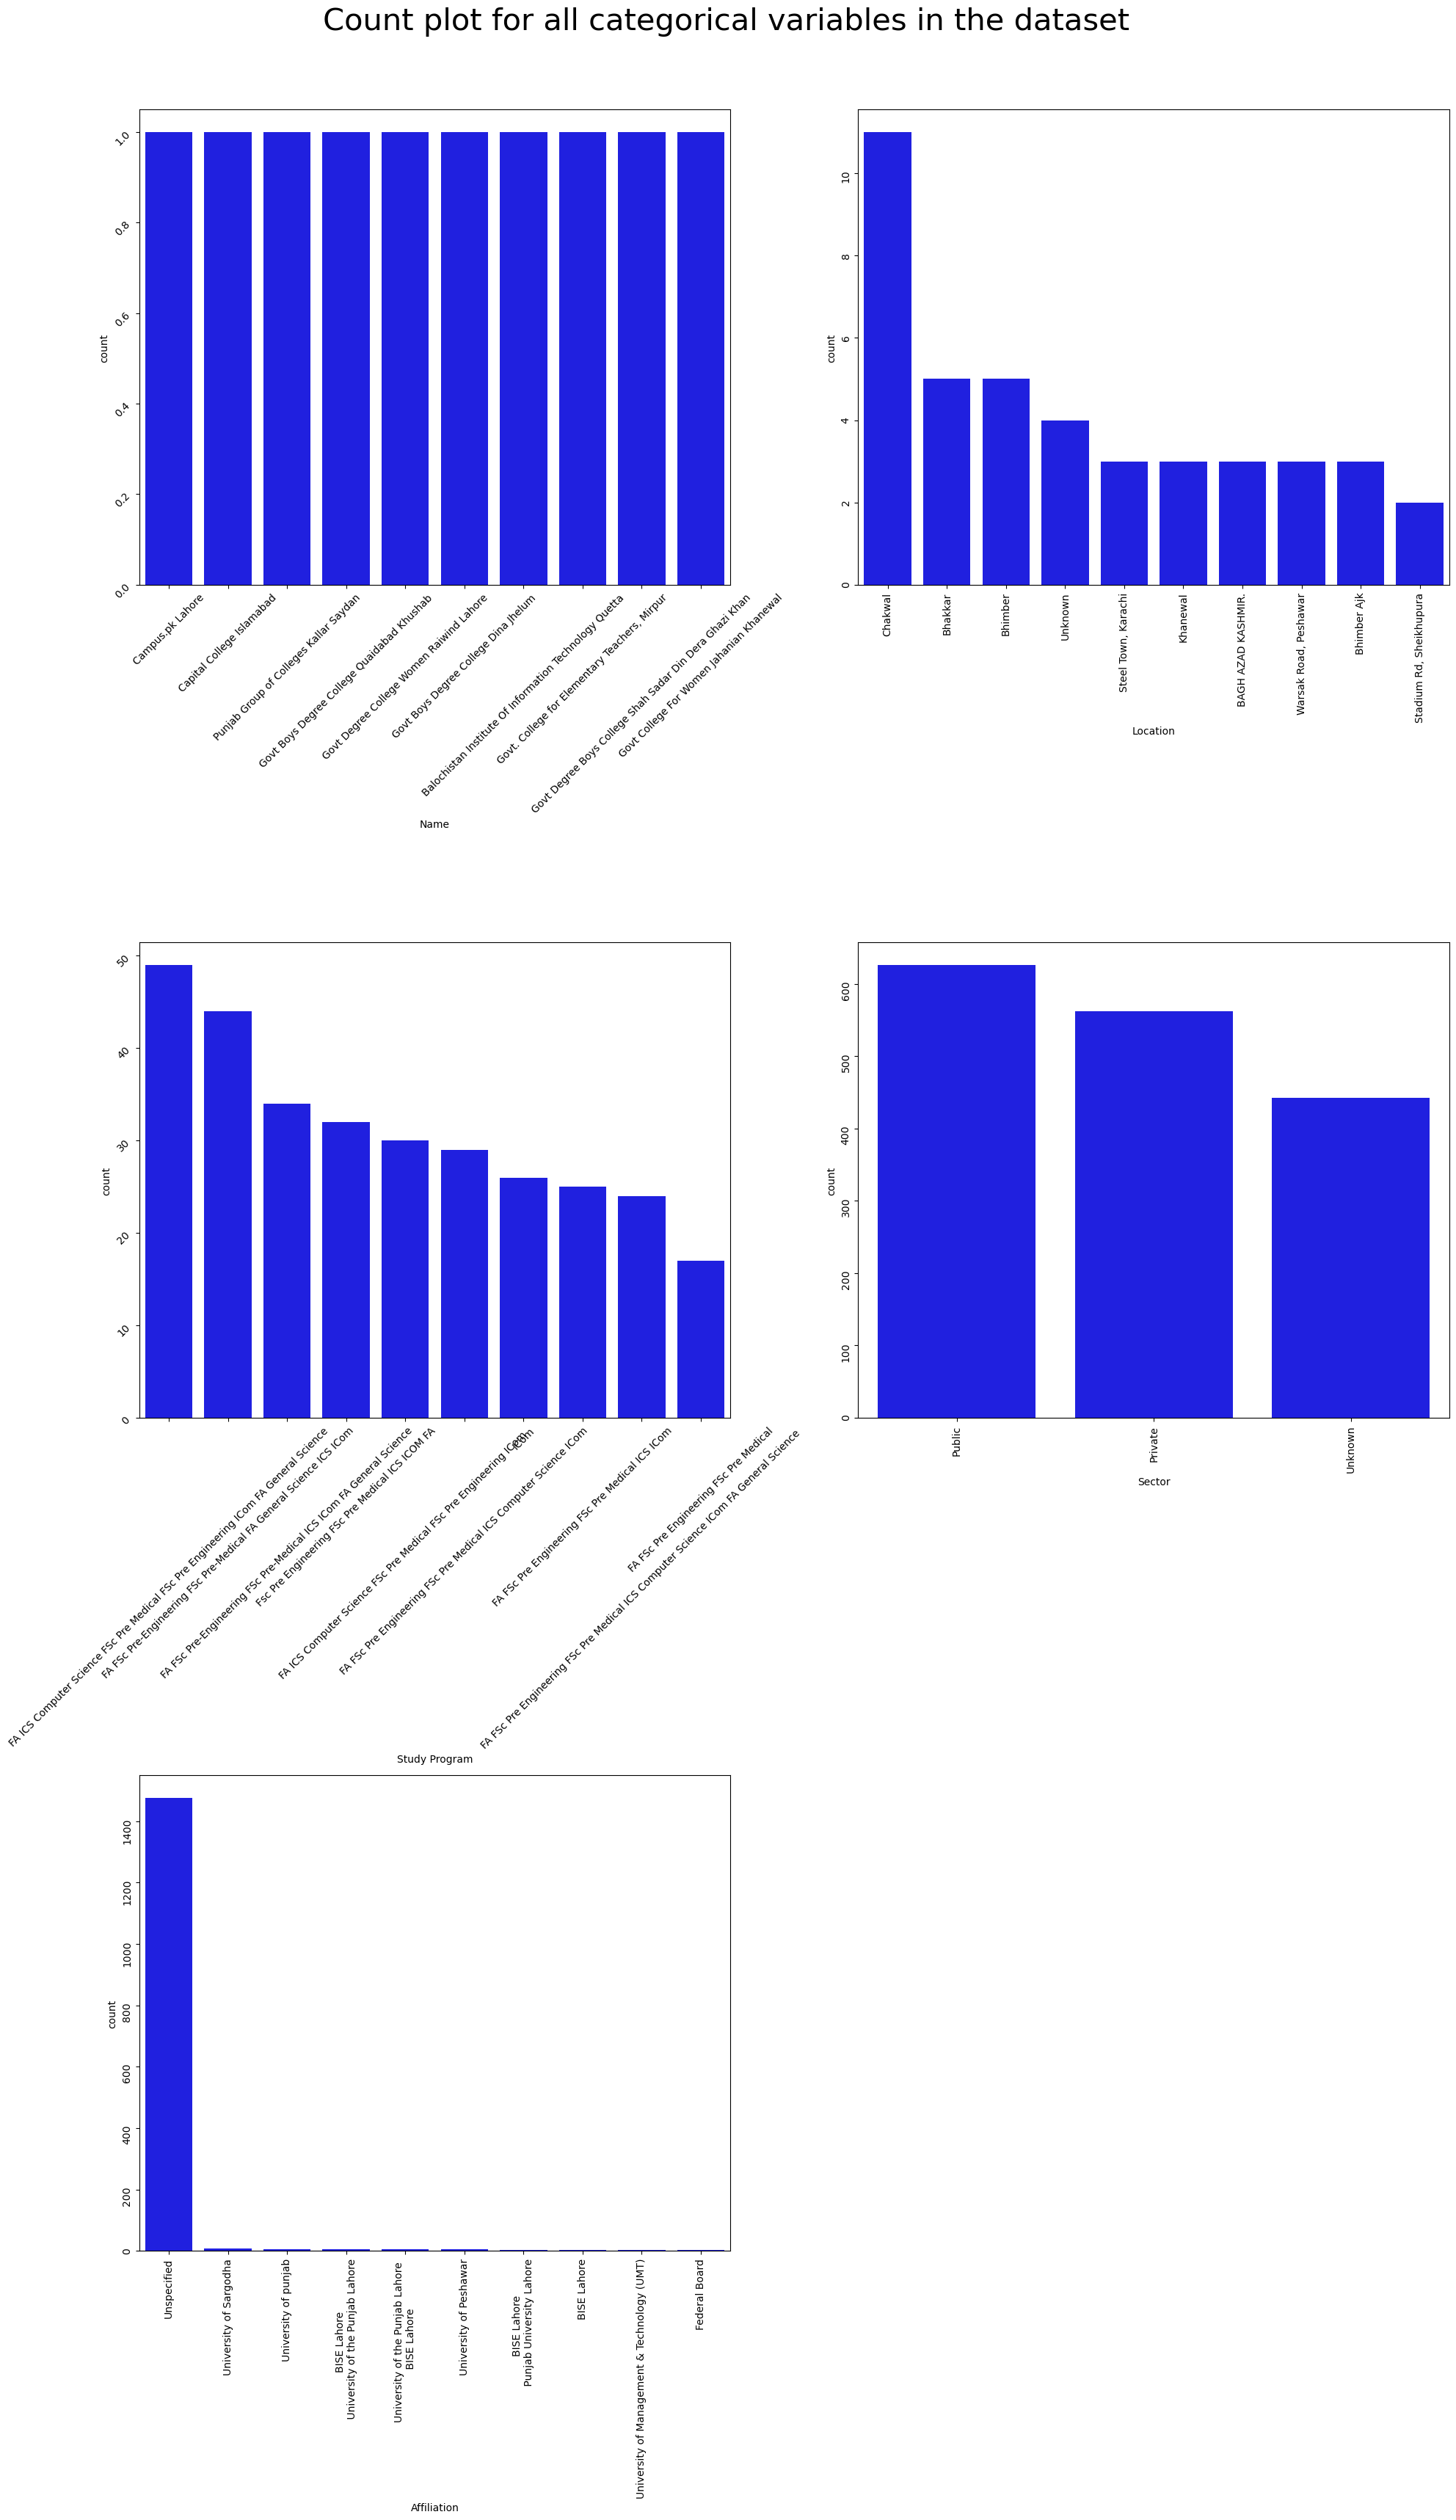

In [28]:
fig, axes = plt.subplots(3, 2, figsize = (20, 35))
fig.suptitle('Count plot for all categorical variables in the dataset', fontsize=30)
sns.countplot(ax = axes[0, 0], data=data[data['Name'].isin(top_Name)], x='Name', order=top_Name, color= 'blue')
sns.countplot(ax = axes[0,1], data=data[data['Location'].isin(top_Location)], x='Location', order=top_Location, color= 'blue')
sns.countplot(ax = axes [1,0], data=data[data['Study Program'].isin(top_StudyProgram)], x='Study Program', order=top_StudyProgram, color= 'blue')
sns.countplot(ax = axes[1,1], data=data[data['Sector'].isin(top_Sector)], x='Sector', order=top_Sector, color= 'blue')
sns.countplot(ax = axes[2,0], data=data[data['Affiliation'].isin(top_Affiliation)], x='Affiliation', order=top_Affiliation, color= 'blue')
fig.delaxes(axes[2, 1])
axes[0][0].tick_params(labelrotation=45);
axes[0][1].tick_params(labelrotation=90);
axes[1][0].tick_params(labelrotation=45);
axes[1][1].tick_params(labelrotation=90);
axes[2][0].tick_params(labelrotation=90);
plt.tight_layout(rect=[0, 0, 1, 0.96])  

# Bivariate Analysis

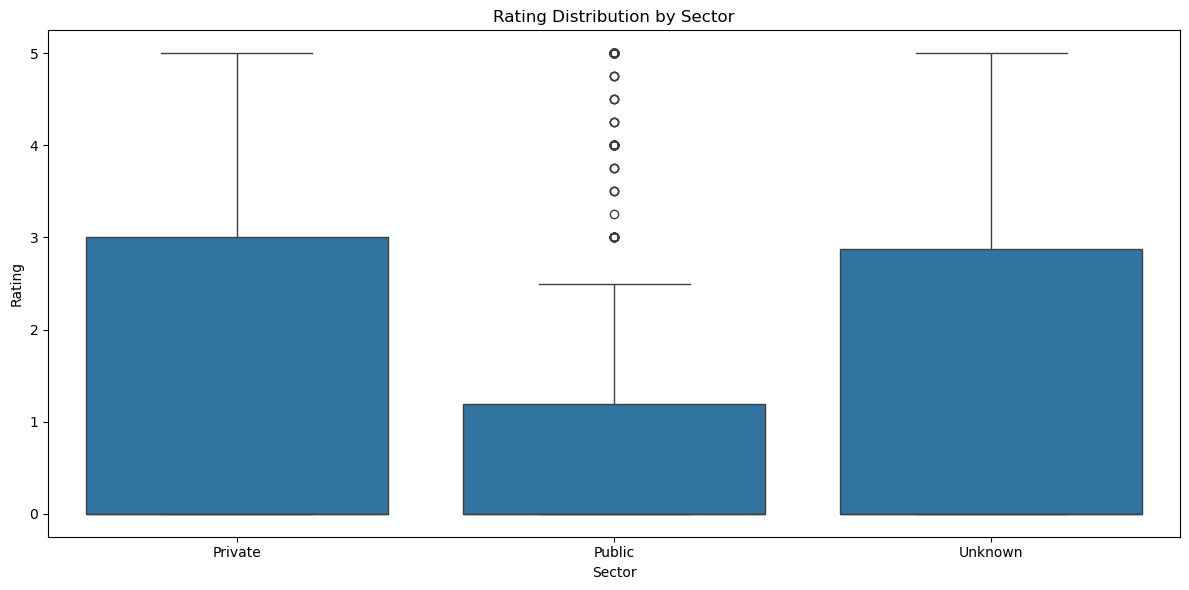

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(data = data, x = 'Sector' , y = 'Rating')
plt.title('Rating Distribution by Sector')
plt.tight_layout()
plt.show()

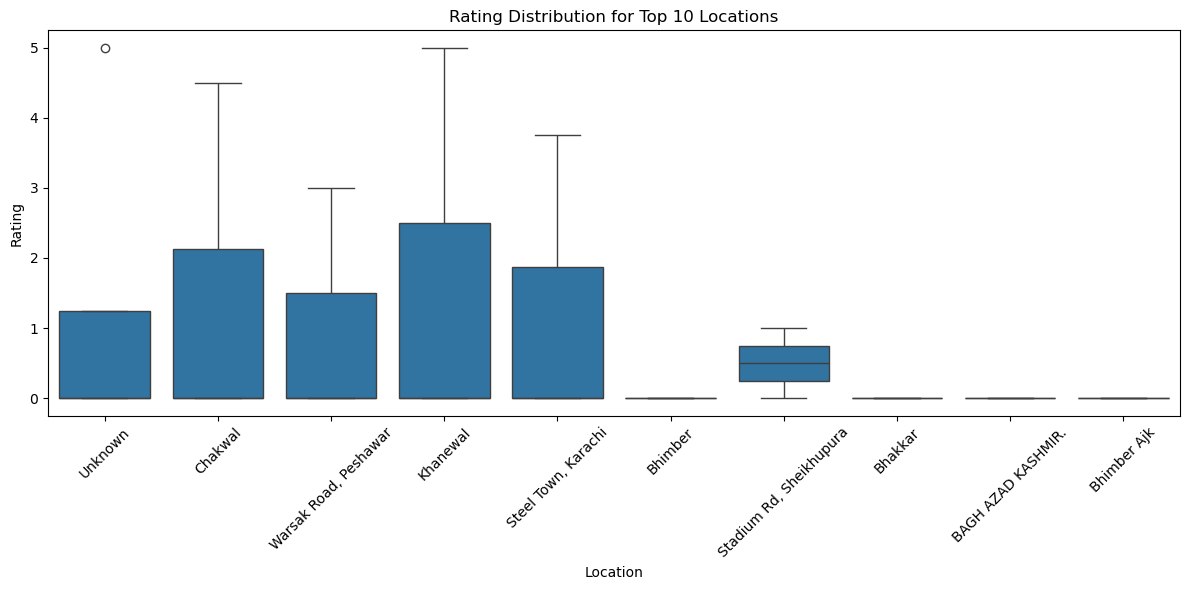

In [30]:
filtered_data = data[data['Location'].isin(top_Location)]
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='Location', y='Rating')
plt.xticks(rotation = 45)
plt.title('Rating Distribution for Top 10 Locations')
plt.tight_layout()
plt.show()

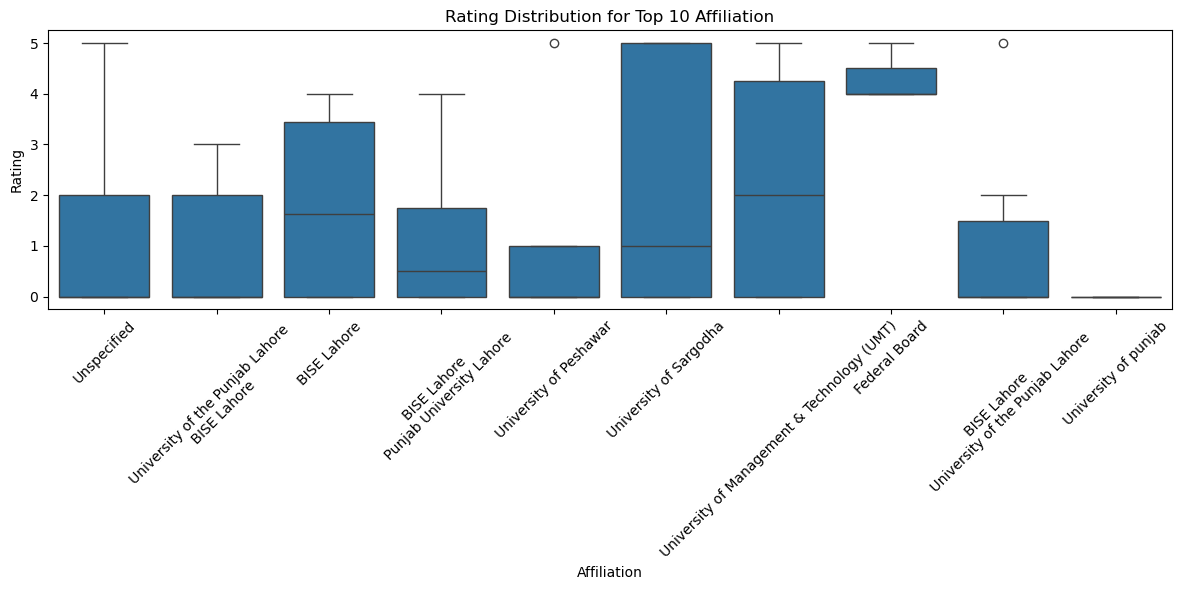

In [31]:
filtered_data = data[data['Affiliation'].isin(top_Affiliation)]
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='Affiliation', y='Rating')
plt.xticks(rotation = 45)
plt.title('Rating Distribution for Top 10 Affiliation')
plt.tight_layout()
plt.show()

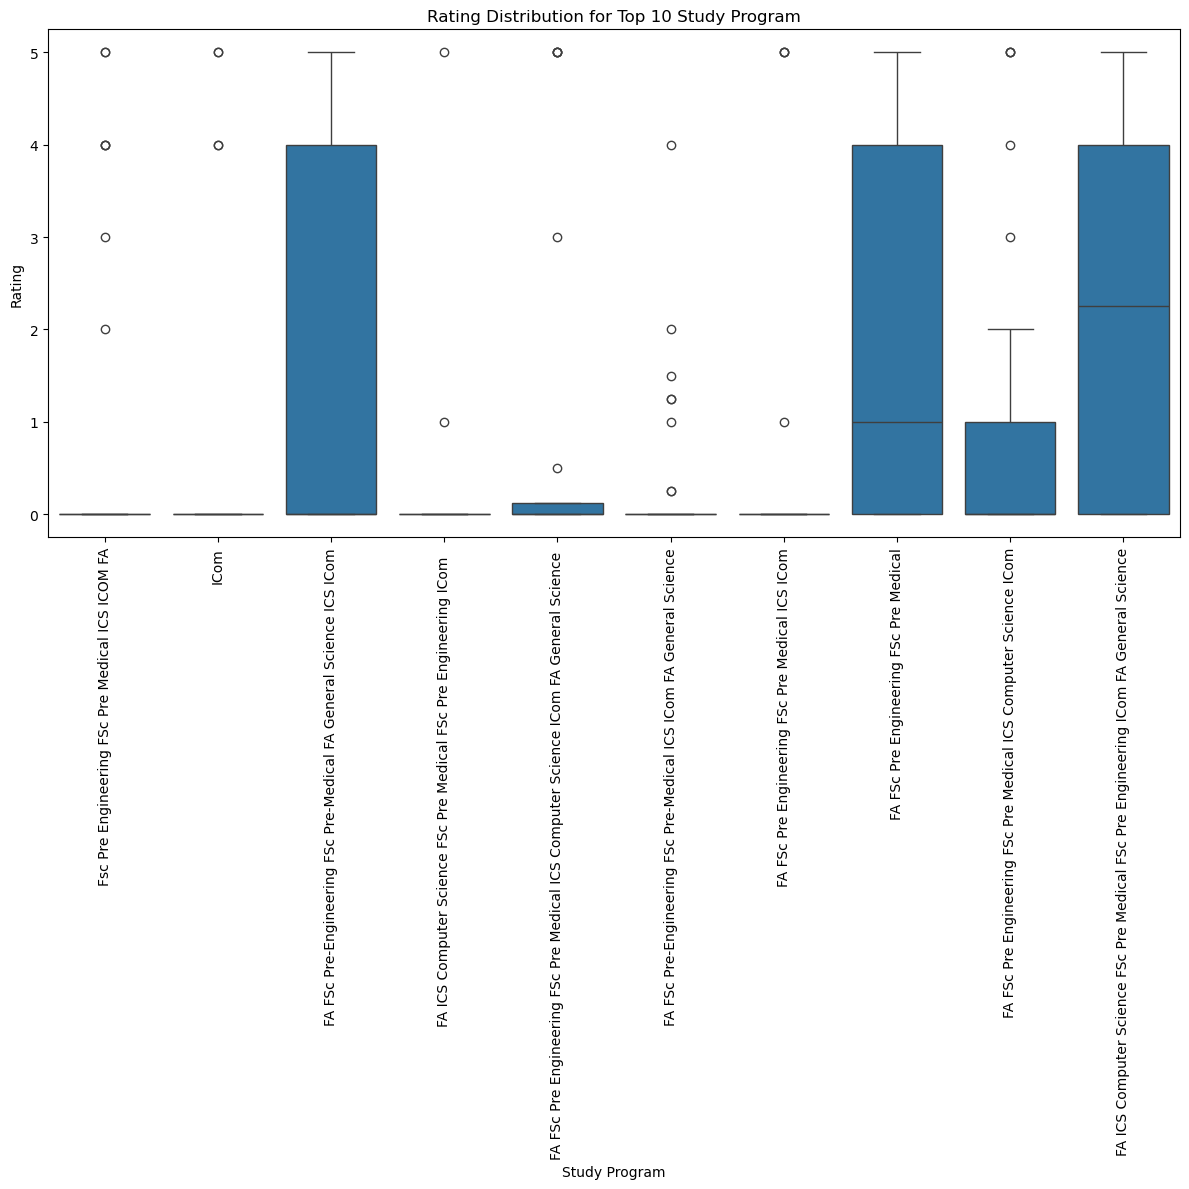

In [32]:
filtered_data = data[data['Study Program'].isin(top_StudyProgram)]
plt.figure(figsize=(12, 12))
sns.boxplot(data=filtered_data, x='Study Program', y='Rating')
plt.xticks(rotation = 90)
plt.title('Rating Distribution for Top 10 Study Program')
plt.tight_layout()
plt.show()

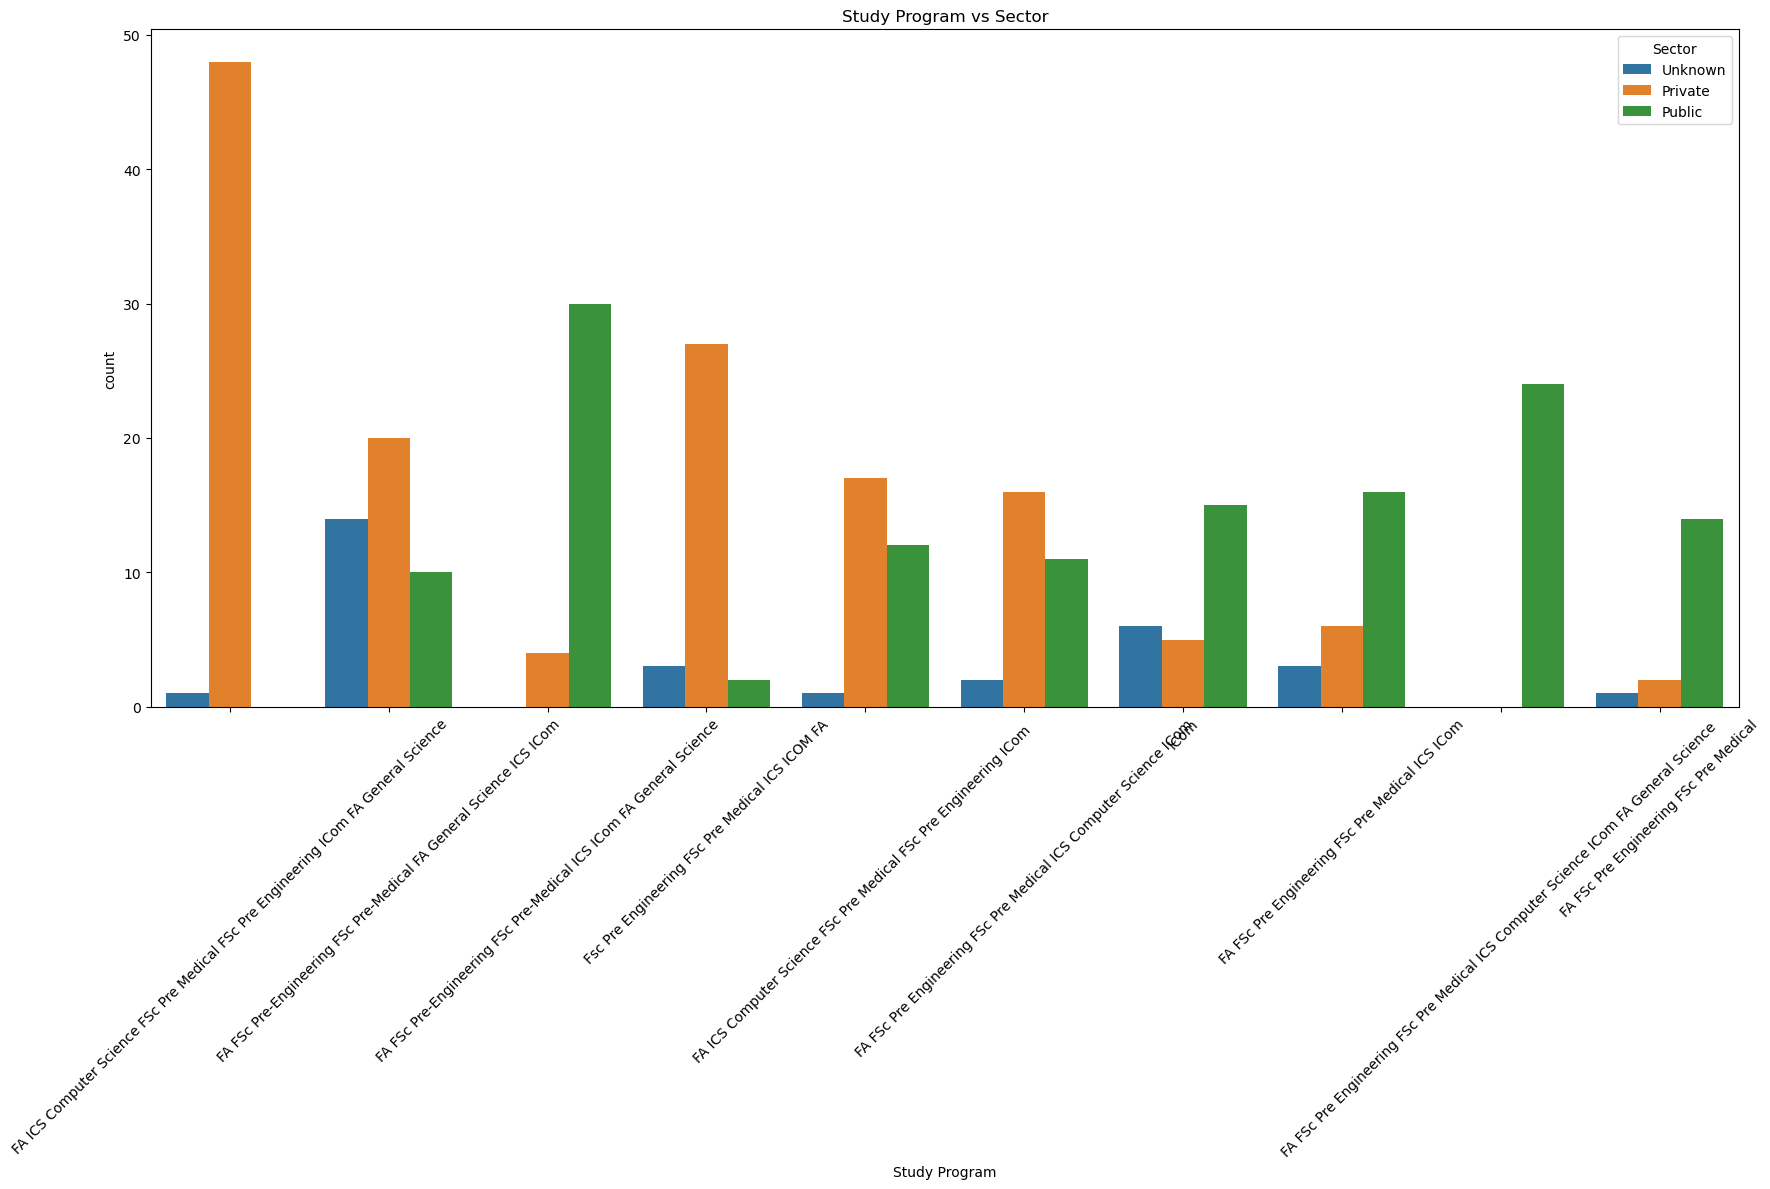

In [33]:
plt.figure(figsize = (18,12))
sns.countplot(data=data[data['Study Program'].isin(top_StudyProgram)], x = 'Study Program' , hue = 'Sector', order = top_StudyProgram)
plt.xticks(rotation=45)
plt.title('Study Program vs Sector')
plt.tight_layout()
plt.show()

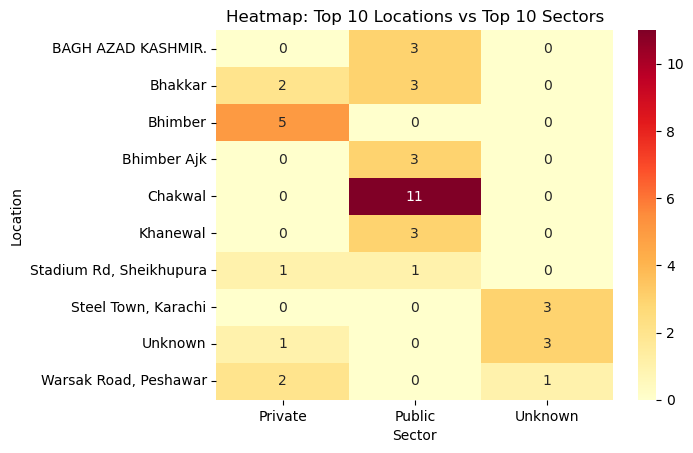

In [34]:
filtered = data[data['Location'].isin(top_Location) & data['Sector'].isin(top_Sector)]
heatmap_data = pd.crosstab(filtered['Location'], filtered['Sector'])

sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Heatmap: Top 10 Locations vs Top 10 Sectors')
plt.show()


# MultiVariate Variables

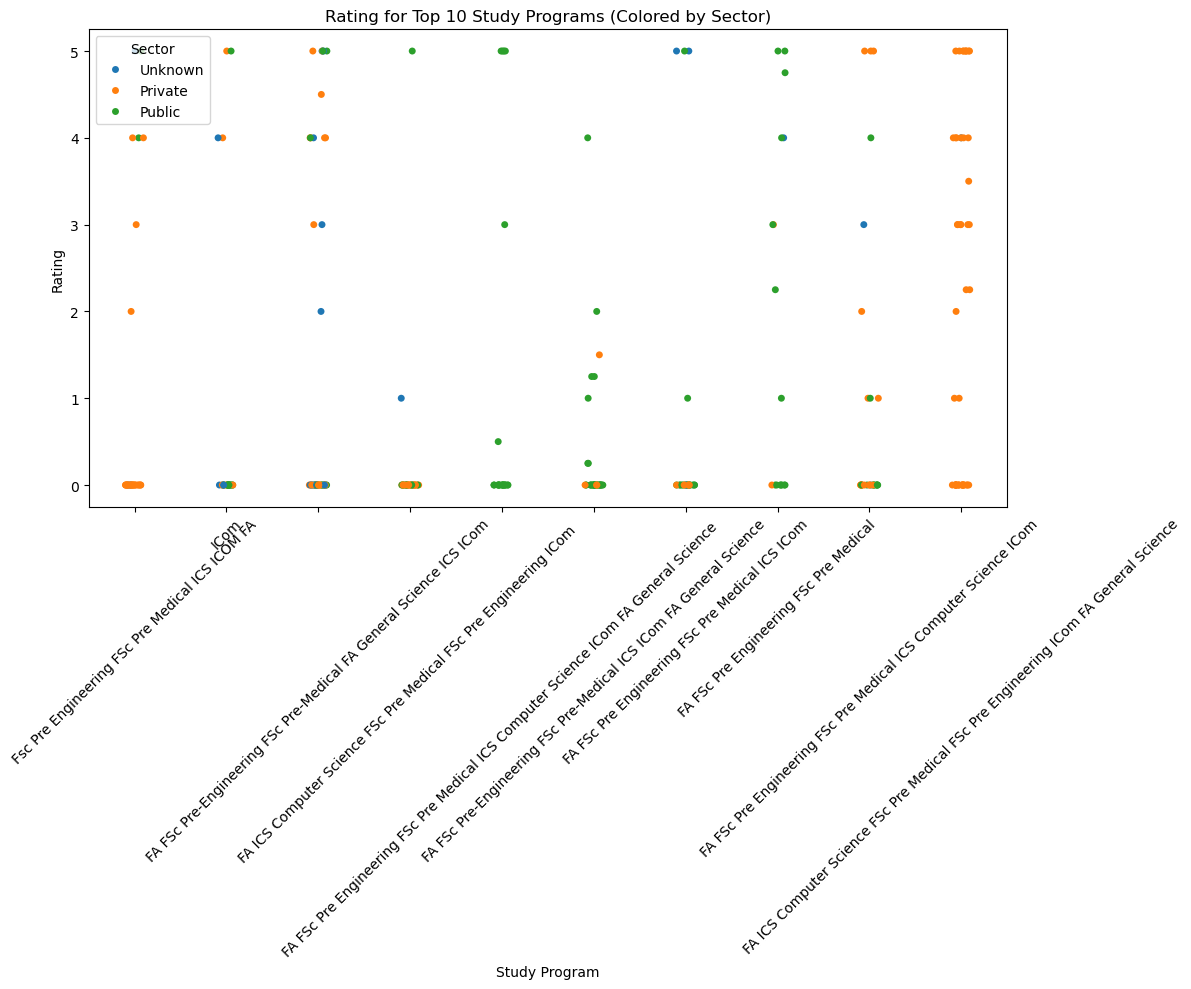

In [35]:
filtered_data = data[data['Study Program'].isin(top_StudyProgram)]
plt.figure(figsize=(12, 10))
sns.stripplot(data=filtered_data, x='Study Program', y='Rating', hue='Sector', jitter=True)
plt.title('Rating for Top 10 Study Programs (Colored by Sector)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

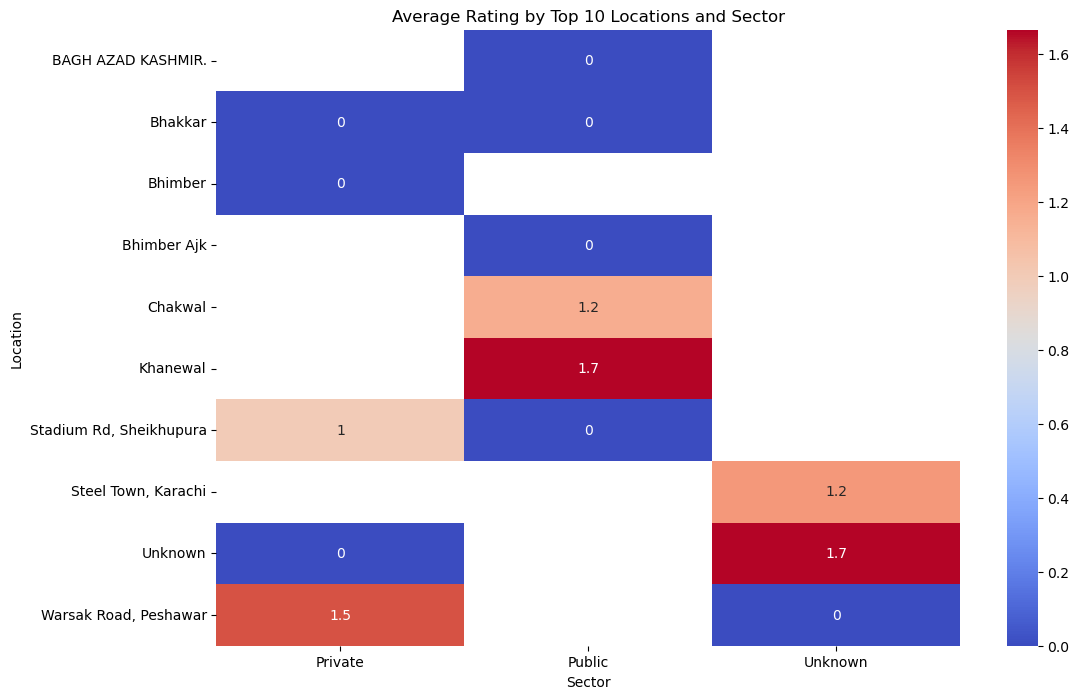

In [36]:
filtered_data = data[data['Location'].isin(top_Location)]
pivot_table = filtered_data.pivot_table(index='Location', columns='Sector', values='Rating', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Average Rating by Top 10 Locations and Sector')
plt.show()

# Automated EDA

In [37]:
!pip install sweetviz


In [39]:
import sweetviz as sv

report = sv.analyze(data)
report.show_html("EDA_Report.html")


                                             |                                             | [  0%]   00:00 ->…

Report EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
